import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import openpyxl
warnings.filterwarnings("ignore")
%matplotlib inline

# Data preparation

In [31]:
df=pd.read_csv(r"C:\Users\shmue\onedrive\documents\ML ophir\project\Cancer_Data.csv")

In [32]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## deletion of Unnamed: 32 - 0 non-null

In [34]:
del df['Unnamed: 32']

In [35]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [37]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [38]:
radius_columns= ['radius_mean', 'radius_se', 'radius_worst']
df[radius_columns].head()

,radius_mean,radius_se,radius_worst
0,17.99,1.0950,25.38
1,20.57,0.5435,24.99
2,19.69,0.7456,23.57
3,11.42,0.4956,14.91
4,20.29,0.7572,22.54


In [41]:
texture_columns= ['texture_mean', 'texture_se', 'texture_worst']
df[texture_columns].head()

,texture_mean,texture_se,texture_worst
0,10.38,0.9053,17.33
1,17.77,0.7339,23.41
2,21.25,0.7869,25.53
3,20.38,1.1560,26.50
4,14.34,0.7813,16.67


In [42]:
perimeter_columns= ['perimeter_mean', 'perimeter_se', 'perimeter_worst']
df[perimeter_columns].head()

,perimeter_mean,perimeter_se,perimeter_worst
0,122.80,8.589,184.60
1,132.90,3.398,158.80
2,130.00,4.585,152.50
3,77.58,3.445,98.87
4,135.10,5.438,152.20


In [43]:
area_columns= ['area_mean', 'area_se', 'area_worst']
df[area_columns].head()

,area_mean,area_se,area_worst
0,1001.0,153.40,2019.0
1,1326.0,74.08,1956.0
2,1203.0,94.03,1709.0
3,386.1,27.23,567.7
4,1297.0,94.44,1575.0


In [44]:
smoothness_columns= ['smoothness_mean', 'smoothness_se', 'smoothness_worst']
df[smoothness_columns].head()

,smoothness_mean,smoothness_se,smoothness_worst
0,0.11840,0.006399,0.1622
1,0.08474,0.005225,0.1238
2,0.10960,0.006150,0.1444
3,0.14250,0.009110,0.2098
4,0.10030,0.011490,0.1374


In [45]:
compactness_columns= ['compactness_mean', 'compactness_se', 'compactness_worst']
df[compactness_columns].head()

,compactness_mean,compactness_se,compactness_worst
0,0.27760,0.04904,0.6656
1,0.07864,0.01308,0.1866
2,0.15990,0.04006,0.4245
3,0.28390,0.07458,0.8663
4,0.13280,0.02461,0.2050


In [46]:
concavity_columns= ['concavity_mean', 'concavity_se', 'concavity_worst']
df[concavity_columns].head()

,concavity_mean,concavity_se,concavity_worst
0,0.3001,0.05373,0.7119
1,0.0869,0.01860,0.2416
2,0.1974,0.03832,0.4504
3,0.2414,0.05661,0.6869
4,0.1980,0.05688,0.4000


In [47]:
concave_points_columns= ['concave points_mean', 'concave points_se', 'concave points_worst']
df[concave_points_columns].head()

,concave points_mean,concave points_se,concave points_worst
0,0.14710,0.01587,0.2654
1,0.07017,0.01340,0.1860
2,0.12790,0.02058,0.2430
3,0.10520,0.01867,0.2575
4,0.10430,0.01885,0.1625


In [48]:
symmetry_columns= ['symmetry_mean', 'symmetry_se', 'symmetry_worst']
df[symmetry_columns].head()

,symmetry_mean,symmetry_se,symmetry_worst
0,0.2419,0.03003,0.4601
1,0.1812,0.01389,0.2750
2,0.2069,0.02250,0.3613
3,0.2597,0.05963,0.6638
4,0.1809,0.01756,0.2364


In [49]:
fractal_dimension_columns= ['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']
df[fractal_dimension_columns].head()

,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
0,0.07871,0.006193,0.11890
1,0.05667,0.003532,0.08902
2,0.05999,0.004571,0.08758
3,0.09744,0.009208,0.17300
4,0.05883,0.005115,0.07678


## Label encoding of diagnosis. 1= malignant, 0= benign

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [51]:
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [52]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
import pickle

with open('cancer_diagnosis.pkl', 'wb') as f:
    pickle.dump(df, f)

print("cancer diagnosis dataset saved as a pickle file.")

cancer diagnosis dataset saved as a pickle file.


In [58]:
with open('cancer_diagnosis.pkl', 'rb') as file:
    loaded_df = pickle.load(file)

In [59]:
loaded_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## run unsupervised learning 

In [60]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
X = loaded_df.loc[:,loaded_df.columns != 'diagnosis']
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
loaded_df = pd.read_pickle('final_df.pkl')
loaded_df.set_index("id", inplace= True)
loaded_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,smoothness_mean,texture_worst,smoothness_worst,concave_points_worst
id,,,,,,,,,,,,,,,,,,,,,
842302.0,1,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,0.2419,0.056846,...,184.6,2019.0,0.6656,0.7119,0.4601,0.11890,0.11840,17.33,0.1622,0.2654
842517.0,1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.1812,0.056670,...,158.8,1956.0,0.1866,0.2416,0.2750,0.08902,0.08474,23.41,0.1238,0.1860
84300903.0,1,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.2069,0.059990,...,152.5,1709.0,0.4245,0.4504,0.3613,0.08758,0.10960,25.53,0.1444,0.2430
84358402.0,1,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.1809,0.058830,...,152.2,1575.0,0.2050,0.4000,0.2364,0.07678,0.10030,16.67,0.1374,0.1625
843786.0,1,12.45,15.70,82.57,477.1,0.17000,0.15780,0.08089,0.2087,0.056846,...,103.4,741.6,0.5249,0.5355,0.3985,0.12440,0.12780,23.75,0.1791,0.1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926125.0,1,20.92,25.09,143.00,1347.0,0.22360,0.31740,0.14740,0.2149,0.068790,...,179.1,1819.0,0.4186,0.6599,0.2929,0.09873,0.10990,29.41,0.1407,0.2542
926424.0,1,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,0.1726,0.056230,...,166.1,2027.0,0.2113,0.4107,0.2060,0.07115,0.11100,26.40,0.1410,0.2216
926682.0,1,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.1752,0.055330,...,155.0,1731.0,0.1922,0.3215,0.2572,0.06637,0.09780,38.25,0.1166,0.1628


In [63]:
X = loaded_df.loc[:,loaded_df.columns != 'diagnosis']
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,perimeter_worst,area_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,smoothness_mean,texture_worst,smoothness_worst,concave_points_worst
id,,,,,,,,,,,,,,,,,,,,,
842302.0,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,0.2419,0.056846,1.0950,...,184.6,2019.0,0.6656,0.7119,0.4601,0.11890,0.11840,17.33,0.1622,0.2654
842517.0,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,0.1812,0.056670,0.5435,...,158.8,1956.0,0.1866,0.2416,0.2750,0.08902,0.08474,23.41,0.1238,0.1860
84300903.0,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.2069,0.059990,0.7456,...,152.5,1709.0,0.4245,0.4504,0.3613,0.08758,0.10960,25.53,0.1444,0.2430
84358402.0,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,0.1809,0.058830,0.7572,...,152.2,1575.0,0.2050,0.4000,0.2364,0.07678,0.10030,16.67,0.1374,0.1625
843786.0,12.45,15.70,82.57,477.1,0.17000,0.1578,0.08089,0.2087,0.056846,0.3345,...,103.4,741.6,0.5249,0.5355,0.3985,0.12440,0.12780,23.75,0.1791,0.1741


In [64]:
kmodel = KMeans(n_clusters=2, random_state=1).fit(X)
kmodel.labels_

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

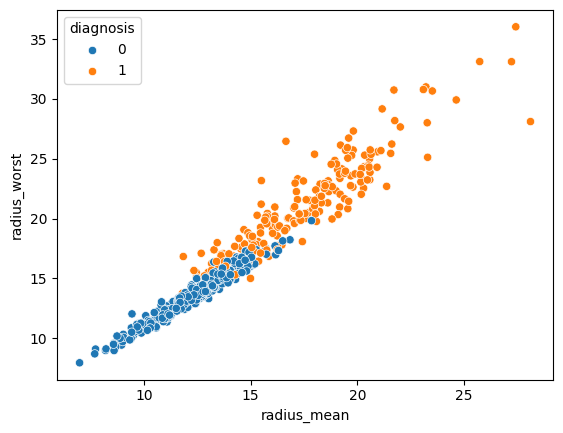

In [65]:
sns.scatterplot(x=loaded_df['radius_mean'], y=loaded_df['radius_worst'], hue=loaded_df['diagnosis'])
plt.show()

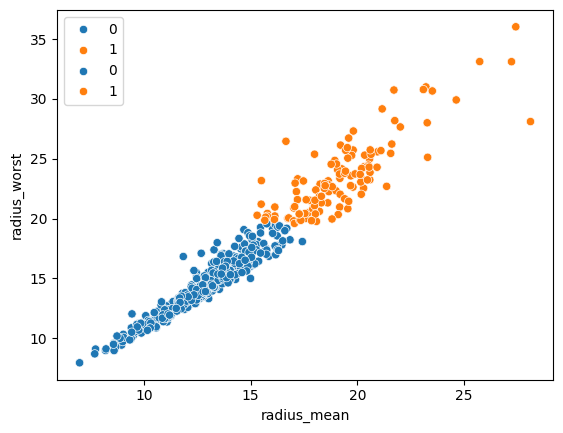

In [67]:
sns.scatterplot(x=X['radius_mean'], y=X['radius_worst'],hue=kmodel.labels_)
plt.show()

In [68]:
pd.crosstab(loaded_df['diagnosis'],kmodel.labels_)

col_0,0,1
diagnosis,,
0,349,1
1,74,123


## Not aweful but strugles to predict malignant tumors 
GaussianMixture predicts better